In [2]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

rootDir = "../CCSN_v3"

img_width, img_height = 150, 150
batch_size = 32
epochs = 30

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.2  
)

train_generator = train_datagen.flow_from_directory(
    rootDir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  
)

validation_generator = train_datagen.flow_from_directory(
    rootDir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation' 
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)


Found 423 images belonging to 3 classes.
Found 103 images belonging to 3 classes.



Epoch 1/30


13/13 [==============================] - ETA: 0s - loss: 1.4329 - accuracy: 0.3708

C:\Users\Baptiste\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 15s 1s/step - loss: 1.4329 - accuracy: 0.3708 - val_loss: 1.1378 - val_accuracy: 0.3542 - lr: 0.0010
Epoch 2/30
13/13 [==============================] - 10s 750ms/step - loss: 1.0027 - accuracy: 0.4471 - val_loss: 0.9633 - val_accuracy: 0.5521 - lr: 0.0010
Epoch 3/30
13/13 [==============================] - 9s 680ms/step - loss: 0.9978 - accuracy: 0.5141 - val_loss: 1.0938 - val_accuracy: 0.3854 - lr: 0.0010
Epoch 4/30
13/13 [==============================] - 9s 686ms/step - loss: 1.0335 - accuracy: 0.4629 - val_loss: 1.0106 - val_accuracy: 0.4583 - lr: 0.0010
Epoch 5/30
13/13 [==============================] - 9s 653ms/step - loss: 1.0538 - accuracy: 0.4476 - val_loss: 1.0412 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 6/30
13/13 [==============================] - 9s 705ms/step - loss: 1.0220 - accuracy: 0.4450 - val_loss: 1.0345 - val_accuracy: 0.5417 - lr: 2.0000e-04
Epoch 7/30
13/13 [==============================] - 10s 735ms/step - loss: 0.9

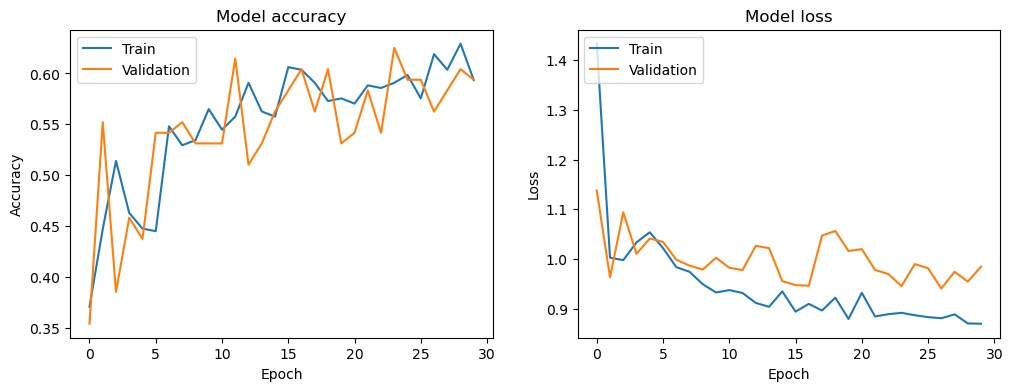

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [7]:
model.save('../models/cloud_classification_model_simplified4.keras')


In [5]:
classes = list(train_generator.class_indices.keys())
print(classes)

['cirrus', 'cumulus', 'stratus']
